In [4]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pickle
import numpy as np

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Model foundation
Consider a risk neutral company wanting to go public. The company can either choose a regular book building process or do an IPO Auction. If they perform the latter, the company will sell $Q$ perfectly divisible shares at an auction, with the objective to maximise the expected revenue. 

There are $N>2$ risk averse (informed) competitive bidders (i.e. institutional investors as pension funds, asset managers, insurance companies, etc.). Risk aversion is modelled through constant absolute risk aversion (CARA) utility preferences with the common Arrow-Pratt risk aversion parameter $\rho \geq 0$, corresponding to an exponential utility function. We assume that bidders' goal is to maximise their utility (or as we will see later; expected utility). 
%
\begin{align} \label{eq:CARA}
U_i(\pi_i)=-e^{-\rho \pi_i}
\end{align}

As with all stocks, the common value of the stock is given by the resale price in the secondary market, which theoretically should reflect the present value of all future cash flows. However, the after market price is unknown at the time of the bid, therefore we denote the intrinsic value of the asset by the random variable $v \in V$. The prior distribution of $V$ is common knowledge to the bidders, the corresponding \textit{cdf} is denoted $F(v)$ and the \textit{pdf} $f(v)$.

Each competitive bidder ($i=1, 2, \dots, N$) submits a bid schedule $x_i(p,s_i)$ dependent on the realisation of their private signal $s_i\in S$, where $S$ is a signal space with a possible infinite number of elements, and the price $p$. we will assume that the bidder's conditional expected value, the conditional mean ($E[v]=\bar{v}\geq 0$), and the variance ($Var[v]=\tau_v^{-1}$) are well defined.

# The Parametric Model
We go straight to the parametric model, as it is the interesting part code wise.

The common value of the asset is $v \sim N(\bar{v}, \tau_v^{-1})$. Where the variance of the asset $v$, $\tau_v^{-1}$, can be seen as valuation dispersion, i.e. $\tau_v^{-1}$ measures how precisely the general public can asses the value of the company. In this sense, more complex issuing companies may lead to a higher variance. The total supply of the asset is given by $Q$.

The parametric IPO auction consists of two stages

1 Each competitive bidder $i$ chooses $\eta_i$, independently from, and simultaneously with, his opponents.

2 After observing the realisation of their private signal $s_{\eta i}$, but not their opponents signals nor their choice of $\eta_j$ ($j \neq i$), each competitive bidder $i$ bid for the shares at the IPO auction. 

In order to solve this parametric model, we postulate that there exist a unique symmetric equilibrium in linear strategies $x_i = \mu + \beta s_{\eta i} - \gamma p$, for which we determine the coefficients and show the strategy is optimal in equilibrium. This is a unique symmetric equilibrium in linear strategies where all bidders chose the signal precision $\eta$. This equilibrium is characterised by:

\begin{align} \label{eq:bidschedule}
x_i = \mu + \beta s_{\eta i} - \gamma p, \quad i=1, 2, \dots, N
\end{align}

After skipping alot of computation the equilibrium strategy  $\gamma$, $\mu$ and $\beta$, which are given as:

\begin{align} \label{eq:betaroot}
\rho \tau_{\eta \epsilon}^{-1} \beta^3 + \frac{N}{N-1} \beta^2 + \frac{\rho \tau_z^{-1}}{N-1}\beta - \frac{(N-2) \tau_{\eta \epsilon}\tau_z^{-1}}{(N-1)^2}=0
\end{align}


\begin{align}
\gamma &= \frac{\beta \tau_\eta - \phi \tau_{\eta \epsilon}(N-1) \gamma }{ \frac{\tau_{\eta \epsilon}}{ \left( \lambda \tau_\eta + \rho + \frac{\phi \tau_{\eta \epsilon} }{\beta} \right)} \left( \lambda \tau_\eta + \rho + \frac{\phi \tau_{\eta \epsilon} }{\beta} \right)} 
\end{align}

\begin{align}
\mu &= \frac{\tau_v \beta \bar{v} + \phi \tau_{\eta \epsilon} (1-(N-1)\mu)}{\frac{\tau_{\eta \epsilon} }{\lambda \tau_\eta + \rho + \frac{\phi \tau_{\eta \epsilon} }{\beta}} \left( \lambda \tau_\eta + \rho + \frac{\phi \tau_{\eta \epsilon} }{\beta} \right)} \nonumber \\
\end{align}

We will isolate $\mu$ and $\gamma$ as a function of $\beta$:

In [26]:
# First we define all needed symbols
N = sm.symbols('N') # Number of bidders
rho = sm.symbols('rho') # Risk averision (CARA)
vbar = sm.symbols('vbar') # Expected Value E[v]
tauv = sm.symbols('tauv') # inverse varianse of value
taue = sm.symbols('taue') # inverse varianse of signal
beta = sm.symbols('beta') # what we call the effect of the signal before we numerically solve the third degree equation
tauz = sm.symbols('tauz') # inverse varianse of z. z is in this project only included for computational reasons
Lambda = sm.symbols('Lambda')  
gamma = sm.symbols('gamma')
mu = sm.symbols('mu')
phi = sm.symbols('phi')
x = sm.symbols('x') # Effect of the signal. It is described as beta above, but in the code we use x for convinense. 

In [10]:
# We begin by isolating gamma
tau = taue + tauv + tauz # Tau is the variance of the expected valuation
cogamma = sm.solve((beta*taue - phi*(N-1)*gamma)/((taue/(Lambda*tau+rho+(phi*taue)/beta))*(Lambda*tau+rho+(phi*taue)/beta))-gamma, gamma)
cogamma

[beta*taue/(N*phi - phi + taue)]

Unfurtunatly we could not get the result of the paper which is

\begin{align}
\gamma = \beta \left(1+ \frac{\tau_v}{\tau_{\eta \epsilon}(1+ \phi (N-1))} \right)
\end{align}

And for some unknown reason our later results did not make sence if we used the above result.

In [11]:
# We then isolate mu
comu = sm.solve((beta*tauv*vbar - phi*taue*(1-(N-1)*mu))/((taue/(Lambda*tau+rho+(phi*taue)/beta))*(Lambda*tau+rho+(phi*taue)/beta))-mu, mu)
comu

[(beta*tauv*vbar - phi*taue)/(taue*(-N*phi + phi + 1))]

Again it is not quite the same as in the article which is:
\begin{align}
\mu &= (\gamma-\beta) \bar{v} + \frac{\phi}{1+(N-1)\phi} \label{eq:mu}
\end{align}
But solving the equations was more to see how the scipy function worked.

The last equation that will be needed but not explained is  $\phi$ which you just need to know is the price efficiency. Hence 
\begin{align}
\phi &= \frac{(N-1)\beta^2}{(N-1)\beta^2 + \tau_{\eta \epsilon}\tau_z^{-1}} \in \left( 0, \frac{N-2}{2(N-1)} \right) \label{eq:phi}
\end{align}

Solving for the optimal bidding strategy we can analyse what, and how information and risk-aversion will affect the expected price

\begin{align}
E[p]&= \bar{v} - \frac{1-\phi}{N \gamma (1+(N-1)\phi)}
\end{align}

### The properties of the parametric model
In the optimal bidding strategy, $\gamma$ is the slope of each bidder's bid schedule. Thus, $\gamma$ is a measure for price elasticity in equilibrium. $\beta$ represents the bidders' responsiveness to their private signal. $\beta$ is positive at all times, indicating that bidders respond positively to their private signals. This fact arises from the affiliation between the signals and the true value. A strictly positive $\beta$ implies that the competitive bidder who values the good the highest receives the largest share.

# Solving the model numerically

### Newtons and Halleys method

#### Disclaimer This is taken from the lecture!!!

We consider solving non-linear equations on the form,

$$ f(x) = 0, x \in \mathbb{R} $$

This is called root-finding.

Derivative based methods
Newton methods: Assume you know the function value and derivatives at $x_0$.

A first order approximate value of the function at $x_1$ then is:

$$ f(x_1) \approx f(x_0) + f^{\prime}(x_0)(x_1-x_0)$$

implying

$$ f(x_1) = 0 \Leftrightarrow x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)} $$

This is called Newtons method.

An alternative is Halleys method, which uses

$$ x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)} \Big[ 1-\frac{f(x_0)}{f^{\prime}(x_0)}\frac{f^{\prime\prime}(x_0)}{2f^{\prime}(x_0)} \Big]^{-1} $$

making use of information from the second derivative.

Algorithm: find_root()

Choose tolerance $\epsilon &gt; 0$, guess on $x_0$ and set $n = 0$.

Calculate $f(x_n)$, $f^{\prime}(x_n)$, and perhaps $f^{\prime\prime}(x_n)$.
If $|f(x_n)| &lt; \epsilon$ stop.

Calculate $x_{n+1}$ using Newtons or Halleys formula (see above).

Set $n = n + 1$ and return to step 2.

In [22]:
def find_root(x0,f,fp,fpp=None,method='newton',max_iter=1000,tol=1e-8,full_info=False):
    """ find root
        
    Args:
    
        x0 (float): initial value
        f (callable): function
        fp (callable): derivative
        fp (callable): second derivative
        method (str): newton or halley
        max_iter (int): maximum number of iterations
        tol (float): tolerance
        full_info (bool): controls information returned
        
    Returns:
    
        x (float/ndarray): root (if full_info, all x tried)
        i (int): number of iterations used
        fx (ndarray): function values used (if full_info) 
        fpx (ndarray): derivative values used (if full_info)
        fppx (ndarray): second derivative values used (if full_info)
        
    """
    
    # initialize
    x = np.zeros(max_iter)
    fx = np.zeros(max_iter)
    fpx = np.zeros(max_iter)
    fppx = np.zeros(max_iter)
    x[0] = x0
    i = 0
    
    # iterate
    while True:
        
        # step 2: evaluate function and derivatives
        fx[i] = f(x[i])
        fpx[i] = fp(x[i])
        if method == 'halley':
            fppx[i] = fpp(x[i])
        
        # step 3: check convergence
        if abs(fx[i]) < tol or i >= max_iter:
            break
            
        # step 4: update x
        if method == 'newton':
            x[i+1] = x[i] - fx[i]/fpx[i]
        elif method == 'halley':
            a = fx[i]/fpx[i]
            b = a*fppx[i]/(2*fpx[i])
            x[i+1] = x[i] - a/(1-b)
        
        # step 5: increment counter
        i += 1
        
    # return
    if full_info:
        return x,i,fx,fpx,fppx
    else:
        return x[i],i

## Testing which method is best at approximating beta

In [47]:
# define exogen paramters as a test

N = 50
rho = 50
vbar = 1
tauv = 5
taue = 8
tauz = 100

In [ ]:
# We first look at the Halley method

In [58]:
def simulate_expected_p(tauz,taue,tauv,rho,vbar,N):
    f = lambda x: rho*taue**(-1)*x**3+N/(N-1)*x**2+rho*tauz**(-1)/(N-1)*x-((N-2)*taue*tauz**(-1))/((N-1)**2) # The function (remember we x instead of beta)
    fp = lambda x: 2*rho*taue**(-1)*x**2+N/(N-1)*x+rho*tauz**(-1)/(N-1) # First drivative
    fpp = lambda x: 6*rho*taue**(-1)*x+N/(N-1) # Second derivatie
    
    x,i = find_root(-5,f,fp,fpp,method='halley') # Using the "find root" algorithm
#    x,i = find_root(-5,f,fp,fpp,method='newton')
   
    phi = ((N-1)*x**2)/((N-1)*x**2+taue*tauz**(-1)) # When beta has been found we can insert it in phi which was price sensitivity 
    
    gamma = x*(1+tauv*taue**(-1)/(1+(N-1)*phi)) # Phi and beta can be inserted into gamma
    
    expected_p = vbar-(1-phi)/(N*gamma*(1+(N-1)*phi)) # Which leads to us being able to compute expected price
        
    return expected_p

#defining loop that lets us look at expected price over N
expected_p_list = []
for N in range(7,50):
    
    expected_p_list.append(simulate_expected_p(tauz,taue,tauv,rho,vbar,N))
print(expected_p_list)

[0.3952588048834892, 0.5231550828584473, 0.6134203714034683, 0.6796863553962017, 0.7298616333354655, 0.76881623679504, 0.7996946092420647, 0.8246058161319978, 0.8450092814271486, 0.861939567816909, 0.8761528091140007, 0.8882055123366049, 0.8985191064015454, 0.9074181899850148, 0.9151514726711859, 0.9219184550124406, 0.9278745117084513, 0.933146456439869, 0.9378360643302379, 0.9420281881465141, 0.9457914900499584, 0.9491835091182154, 0.9522526218367751, 0.955038575933651, 0.9575760443827032, 0.9598938834890098, 1.0016262488198961, 1.0013084500983698, 1.0011024332454055, 0.9674247700074815, 0.968960112808176, 0.9703832882922616, 1.0006531559851926, 0.972936584507568, 1.0005278323805777, 1.0004781249153234, 1.0004349325830781, 1.0003971304724364, 1.000363845792943, 1.0003343731375203, 0.9795940443628078, 0.9803301463397966, 0.981024815195463]


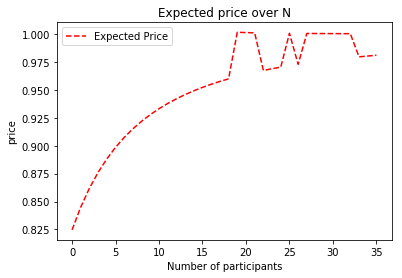

In [60]:
# plotting figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(expected_p_list[7:50],'r--',label="Expected Price")
plt.legend()
plt.title("Expected price over N")
plt.xlabel('Number of participants')
plt.ylabel('price')
plt.show()

As seen in the figure above it is not smooth at all which means the "halleys" method is not a good way to approximate beta. Thus we try with the newton method.

In [61]:
def simulate_expected_p(tauz,taue,tauv,rho,vbar,N):
    f = lambda x: rho*taue**(-1)*x**3+N/(N-1)*x**2+rho*tauz**(-1)/(N-1)*x-((N-2)*taue*tauz**(-1))/((N-1)**2) # The function (remember we x instead of beta)
    fp = lambda x: 2*rho*taue**(-1)*x**2+N/(N-1)*x+rho*tauz**(-1)/(N-1) # First drivative
    fpp = lambda x: 6*rho*taue**(-1)*x+N/(N-1) # Second derivatie
    
#   x,i = find_root(-5,f,fp,fpp,method='halley') # Using the "find root" algorithm
    x,i = find_root(-5,f,fp,fpp,method='newton')
   
    phi = ((N-1)*x**2)/((N-1)*x**2+taue*tauz**(-1)) # When beta has been found we can insert it in phi which was price sensitivity 
    
    gamma = x*(1+tauv*taue**(-1)/(1+(N-1)*phi)) # Phi and beta can be inserted into gamma
    
    expected_p = vbar-(1-phi)/(N*gamma*(1+(N-1)*phi)) # Which leads to us being able to compute expected price
        
    return expected_p

#defining loop that lets us look at expected price over N
expected_p_list = []
for N in range(7,50):
    
    expected_p_list.append(simulate_expected_p(tauz,taue,tauv,rho,vbar,N))
print(expected_p_list)

[0.395258674025628, 0.5231549566509033, 0.6134194700748861, 0.6796872216925881, 0.7298624852759854, 0.7688162407355085, 0.7996954365972444, 0.8246064472505937, 0.845008704791858, 0.8619401879792398, 0.876152717861291, 0.8882048843025689, 0.8985191165680196, 0.9074176432892418, 0.9151514616319281, 0.9219184843084098, 0.9278740725931013, 0.9331459578610027, 0.9378360282505352, 0.9420286719114582, 0.9457919326783959, 0.9491835003460157, 0.9522522384006388, 0.9550381525056313, 0.9575756635188839, 0.9598938659740973, 1.0016262514168346, 1.0013084343042948, 1.001102420569103, 1.000949905077947, 1.0008303458854892, 1.000733450237346, 1.0006531524087527, 1.0005855194214102, 1.0005278298570737, 1.0004781230647142, 1.000434930355825, 1.0003971308531865, 1.000363844393682, 1.0003343721766234, 1.000308149868454, 1.0002847185198993, 1.00026369759772]


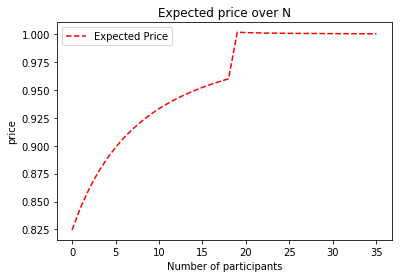

In [64]:
# plotting figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(expected_p_list[7:50],'r--',label="Expected Price")
plt.legend()
plt.title("Expected price over N")
plt.xlabel('Number of participants')
plt.ylabel('price')
plt.show()

This figure is much better and we are now ready to interpret how different parameters affect the expected price. We wil do that with an interactive figure.

In [65]:
def interactive_figure(tauz,taue,tauv,rho,vbar,N):
    
    # a.
    expected_p_list = []
    for N in range(3,50):
        expected_p_list.append(simulate_expected_p(tauz,taue,tauv,rho,vbar,N))
    
    # b. figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.plot(expected_p_list[3:50],'r--',label="Expected Price")
    plt.legend()
    plt.title("Expected price over N")
    plt.xlabel('N')
    plt.ylabel('price')
    plt.show()
    

# Conclusion
First as a note, the full price of the company is one. Also when you play around with the figure remember it is the inverse of the variance hence low values means high variance and vice versa.

First of you wil notice that the more who participate the higher the expected price will be, no matter the bidders information or riskaversion. Hence, the auctioner or the invetment bankers in this case whishes to promote the issued company as much as possible such that moste people participate. The reason for this mechanism is just basic demand and supply. However there are also other explanasions to this correlation, which is evolvs around bidshading. The fewer people participating them more power over price they have, and thus will not bid their true value.

If you start sliding the riskaversion you will see that the less riskavers people are the fewer is needed to reach an expected price of one. That is due to people not being "afraid" of winners curse meaning paying too much given the others bids. 

When sliding the variance it makes the most sense if the riskaverse button is all the way to the right. Here you will see that more accurate information leads to higher expected price, thus the auctioneer would want to provide bidders with as much information as possible.

In [71]:
style = {'description_width': 'initial'} # this is used to make place for the longer descrpitions at the slidebar
widgets.interact(interactive_figure,
    N=widgets.fixed(N),
    tauz=widgets.fixed(tauz),
    vbar=widgets.fixed(vbar),
    rho=widgets.FloatSlider(description="$Risk aversion$", min=30, max=100, step=2, value=1,style=style),
    taue=widgets.FloatSlider(description="$Variance of signal$", min=8, max=25, step=1, value=1, style=style),
    tauv=widgets.FloatSlider(description="$Variance of value$", min=5, max=100, step=1, value=1, style=style),
);

interactive(children=(FloatSlider(value=8.0, description='$Variance of signal$', max=25.0, min=8.0, step=1.0, …